# Examples


## Packages


In [256]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

sns.set_style("white")

## Simple Example

$$|g(x) - f(x)| < \epsilon$$
where $\epsilon > 0$ for all inputs x. g(x) is the output from the neural network and f(x) is some function that we are provided.


In [414]:
# Define the polynomial function
def polynomial(x):
    return x**4 + 5 * x**3+ 7 * x**2 - 5 * x + 2

In [415]:
# Generate random training data
np.random.seed(0)
X_train = np.random.uniform(-10, 10, size=(1000,))
y_train = polynomial(X_train)

# Generate random validation data
X_val = np.random.uniform(-10, 10, size=(100,))
y_val = polynomial(X_val)

# Generate random test data
X_test = np.random.uniform(-10, 10, size=(100,))
# Need to sort for plotting purposes
X_test.sort()
y_test = polynomial(X_test)

# Run test cases for different neuron counts
neuron_counts = [25, 50, 100,200,400,800,1600]
y_pred_list = []

for neurons in neuron_counts:
    # Define the model
    model = Sequential([
        InputLayer(input_shape=[1]),
        Dense(neurons, activation="sigmoid"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mse")

    # Train the model
    history = model.fit(
        X_train, 
        y_train,
        validation_data=(X_val, y_val),
        epochs=600,
        batch_size=50,
        verbose = "0"
    )

    # Find the predicted y value
    y_pred = model.predict(X_test)
    y_pred_list.append(y_pred)

Epoch 1/600
Epoch 2/600
Epoch 3/600
Epoch 4/600
Epoch 5/600
Epoch 6/600
Epoch 7/600
Epoch 8/600
Epoch 9/600
Epoch 10/600
Epoch 11/600
Epoch 12/600
Epoch 13/600
Epoch 14/600
Epoch 15/600
Epoch 16/600
Epoch 17/600
Epoch 18/600
Epoch 19/600
Epoch 20/600
Epoch 21/600
Epoch 22/600
Epoch 23/600
Epoch 24/600
Epoch 25/600
Epoch 26/600
Epoch 27/600
Epoch 28/600
Epoch 29/600
Epoch 30/600
Epoch 31/600
Epoch 32/600
Epoch 33/600
Epoch 34/600
Epoch 35/600
Epoch 36/600
Epoch 37/600
Epoch 38/600
Epoch 39/600
Epoch 40/600
Epoch 41/600
Epoch 42/600
Epoch 43/600
Epoch 44/600
Epoch 45/600
Epoch 46/600
Epoch 47/600
Epoch 48/600
Epoch 49/600
Epoch 50/600
Epoch 51/600
Epoch 52/600
Epoch 53/600
Epoch 54/600
Epoch 55/600
Epoch 56/600
Epoch 57/600
Epoch 58/600
Epoch 59/600
Epoch 60/600
Epoch 61/600
Epoch 62/600
Epoch 63/600
Epoch 64/600
Epoch 65/600
Epoch 66/600
Epoch 67/600
Epoch 68/600
Epoch 69/600
Epoch 70/600
Epoch 71/600
Epoch 72/600
Epoch 73/600
Epoch 74/600
Epoch 75/600
Epoch 76/600
Epoch 77/600
Epoch 78

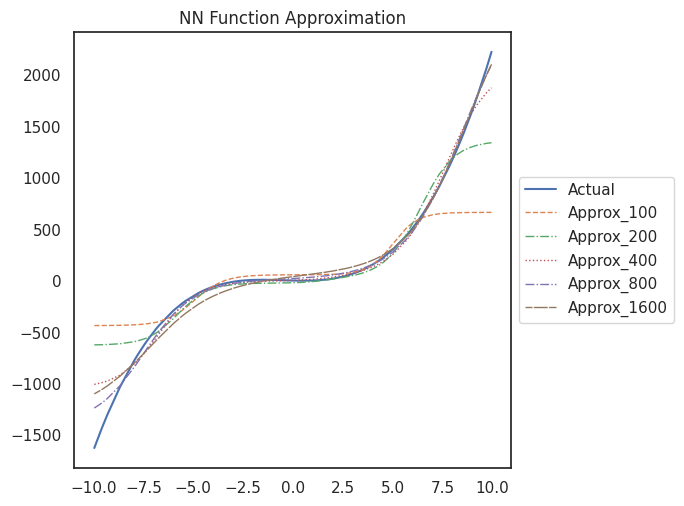

In [263]:
# Plot predicted values and test data

linestyles = ["--", "-.", ":", "dashdot", (5, (10,1))]

fig, ax = plt.subplots(1,1,figsize=(7,5))
plt.plot(X_test, y_test, label="Actual")

for i, y_pred in enumerate(y_pred_list):
    plt.plot(X_test, y_pred, linewidth=1, linestyle = linestyles[i], label=f"Approx_{neuron_counts[i]}")

plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.title("NN Function Approximation")
plt.show()

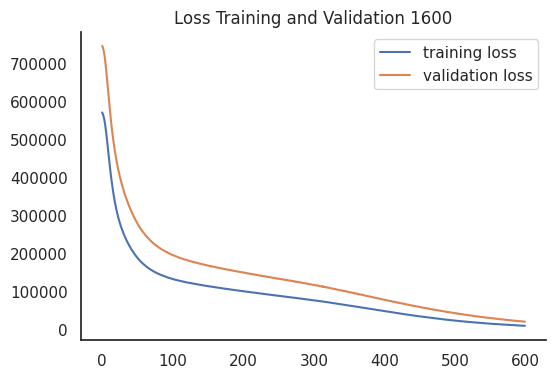

In [258]:
# Plot the development of the loss function for 1600 neurons during training
fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Loss Training and Validation 1600")
plt.legend()
plt.show()

## How does each Neuron Work - Weights and Biases?

Sigmoid Neurons

Inputs can be between 0 or 1.

Has weights for each input $w_1, w_2, \ldots$, and an overall bias b.

Output is not 0 or 1 and is instead the function $\sigma(w * x + b)$.

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
where z
$$z = \sum_{j}w_{j}x_{j} - b$$

When z is large then $z^{-z} = 0$ and the vice versa is true.

We can think of a sigmoid function as the probability of something being activated since we take a value between 0 and 1. And the result is the weighted sum. In the case of a MLP what you have instead is [0,1] which means that you only have two results in that case.

What happens if we instead take the sigmoid function vs the relu function? Does one map to nonlinearities faster? What sort of questions are either one better for answering?


In [300]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

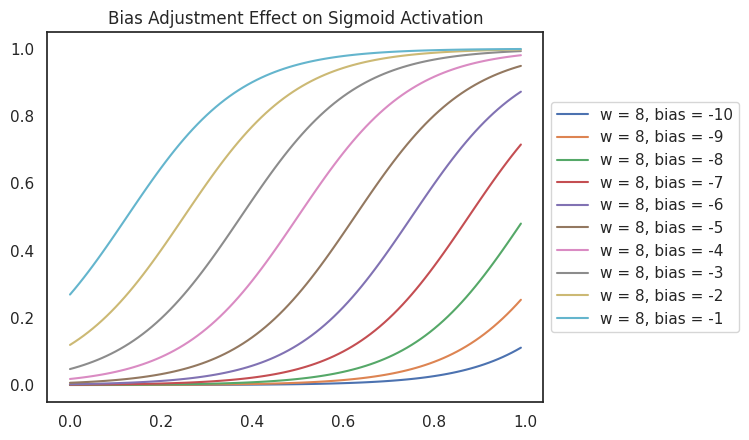

In [301]:
w = np.arange(0, 10, 1)
b = np.arange(-10, 0, 1)
x = np.arange(0,1,0.01)

for weight in w[8:9]:
    for bias in b:
        summation = weight * x
        z = summation + bias
        activation = sigmoid(z)
        plt.plot(x, activation, label = f"w = {round(weight)}, bias = {round(bias)}")
plt.title("Bias Adjustment Effect on Sigmoid Activation")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

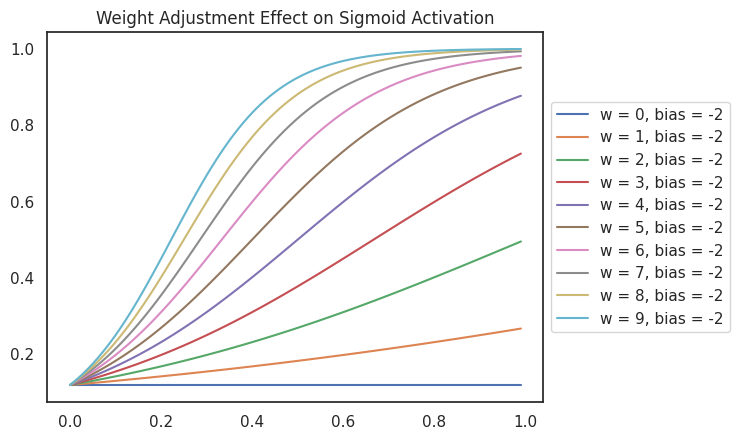

In [302]:
for weight in w:
    for bias in b[8:9]:
        summation = weight * x
        z = summation + bias
        activation = sigmoid(z)
        plt.plot(x, activation, label = f"w = {round(weight)}, bias = {round(bias)}")
plt.title("Weight Adjustment Effect on Sigmoid Activation")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

## What if we had another neuron?

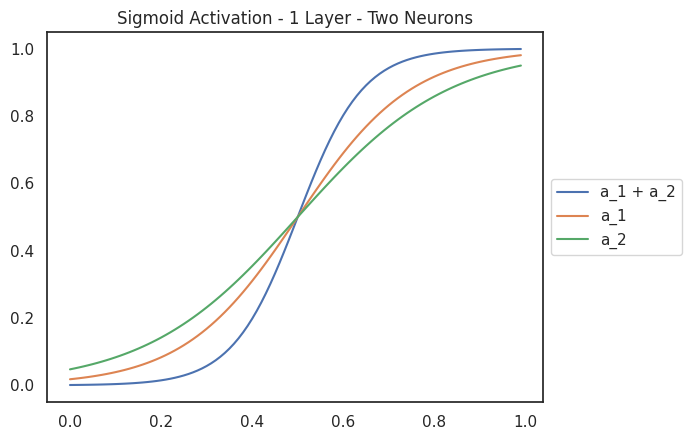

In [413]:
xx = np.reshape(x, (x.shape[0],1))
w = np.array([[8],[6]])
b = np.array([[-4],[-3]])

z_1 = w[0] * xx + b[0]
z_2 = w[1] * xx + b[1]

z_11 = np.sum(w * xx.T + b, axis=0) # Equivalent of z_1 + z_2

a_11 = sigmoid(z_11)
a_1 = sigmoid(z_1)
a_2 = sigmoid(z_2)

plt.plot(x, a_11, label="a_1 + a_2")
plt.plot(x, a_1, label="a_1")
plt.plot(x, a_2, label="a_2")
plt.title("Sigmoid Activation - 1 Layer - Two Neurons")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

## Consider an Example with a Step Function - For a X neuron and Y Layer situation

In [ ]:
def step_function(x, step_size):
    return np.where(x >= step_size, 1, 0)

In [ ]:
number_of_layers = 3
number_of_neurons = 100


## How would this work with higher states?

Lets go through an example a cobb douglas production function for a two state model

In [416]:
def cobb_douglas_function(K, L, A=1, weight=0.7):
    return A * K**weight * L**(1 - weight)

In [421]:
np.random.seed(5)
K_train = np.random.uniform(-10, 10, size=(1000,))
L_train = np.random.uniform(-10, 10, size=(1000,))
y_train = cobb_douglas_function(K_train, L_train)

# Generate random validation data
K_val = np.random.uniform(-10, 10, size=(100,))
L_val = np.random.uniform(-10, 10, size=(100,))
y_val = cobb_douglas_function(K_val, L_val)

# Generate random test data
K_test = np.random.uniform(-10, 10, size=(100,))
L_test = np.random.uniform(-10, 10, size=(100,))
y_test = cobb_douglas_function(K_test, L_test)

model = Sequential([
    InputLayer(input_shape=[2]),
    Dense(800, activation="sigmoid"),
    Dense(1)
])

# Compile the model
model.compile(optimizer="adam", loss="mse")

# Prepare the input and validation datasets
x_train_set = np.concatenate((K_train, L_train), axis=0) 
x_val_set = np.concatenate((K_val, L_val), axis=0)


# Train the model
history = model.fit(
    x_train_set, 
    y_train_set,
    validation_data=(X_val_set, y_val_set),
    epochs=600,
    batch_size=50,
    verbose = "0"
)

/tmp/ipykernel_121879/3889791808.py:2: RuntimeWarning: invalid value encountered in power
  return A * K**weight * L**(1 - weight)


ValueError: Data cardinality is ambiguous:
  x sizes: 2000
  y sizes: 1000
Make sure all arrays contain the same number of samples.

## How does this compare the Chebeshev polynomial?

In [420]:
np.concatenate((K_train, L_train), axis=0) 

array([-5.56013658,  7.41464612, -5.86561689, ..., -0.19406579,
        0.52420179, -1.93123531])

## Lets run through Jesus Example

## Width vs Depth of a Model

## What would model optimization look like?